In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import requests
from matplotlib.backends.backend_pdf import PdfPages
import calendar, time
from datetime import datetime

In [2]:
lees = '09380000'
phantom = '09402500'
diamond = '09404200'

## get all the iv data

In [3]:
def make_url(site_num):
    iv_url = 'http://waterservices.usgs.gov/nwis/iv/?format=rdb'
    iv_url += '&sites={0}'.format(site_num)
    iv_url += '&startDT=1919-01-01'
    iv_url += '&parameterCd=00060'
    return iv_url


In [4]:
# the URL is just a long string
site_num = {'phantom': phantom,
            'lees':lees,
            'diamond': diamond}
urls = {i:make_url(site_num[i]) for i in site_num.keys()}

In [5]:
urls

{'phantom': 'http://waterservices.usgs.gov/nwis/iv/?format=rdb&sites=09402500&startDT=1919-01-01&parameterCd=00060',
 'lees': 'http://waterservices.usgs.gov/nwis/iv/?format=rdb&sites=09380000&startDT=1919-01-01&parameterCd=00060',
 'diamond': 'http://waterservices.usgs.gov/nwis/iv/?format=rdb&sites=09404200&startDT=1919-01-01&parameterCd=00060'}

In [6]:
def read_data(url, sitenum):
    df = pd.read_csv(url, comment='#', header=[0,1], sep='\t')
    df.columns =  [i[0] for i in df.columns]
    df.datetime = pd.to_datetime(df.datetime)
    df.set_index('datetime',drop=True,inplace=True)
    datacol = [i for i in df.columns if i.endswith('00060')][0]
    df = df[datacol].to_frame()
    df.columns=['Q']
    df['year'] = [i.year for i in df.index]
    df['month'] = [i.month for i in df.index]
    df['day'] = [i.day for i in df.index]
    df['hour'] = [i.hour for i in df.index]
    df.to_csv(f'iv_{sitenum}.csv')
    return df

In [7]:
read_orig=False

alldat = {}
for sitenum, url in urls.items():
    print(f'reading {sitenum}')
    if read_orig:
        alldat[sitenum] = read_data(url, sitenum)
    else:
        alldat[sitenum] = pd.read_csv(f'iv_{sitenum}.csv', index_col=0)
        alldat[sitenum].index = pd.to_datetime(alldat[sitenum].index) 

   

reading phantom
reading lees
reading diamond


(5000.0, 20000.0)

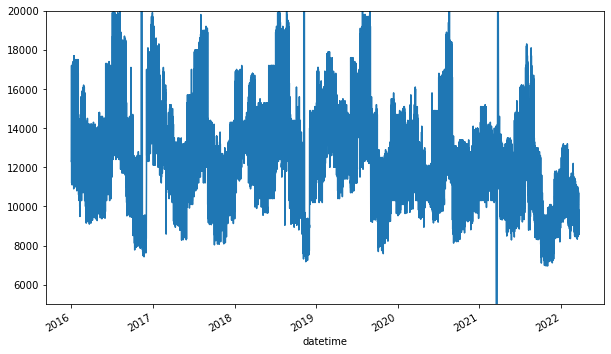

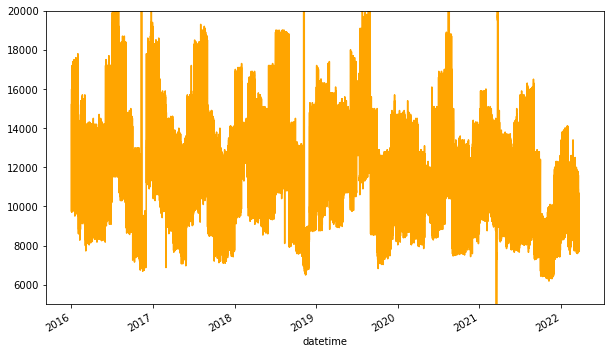

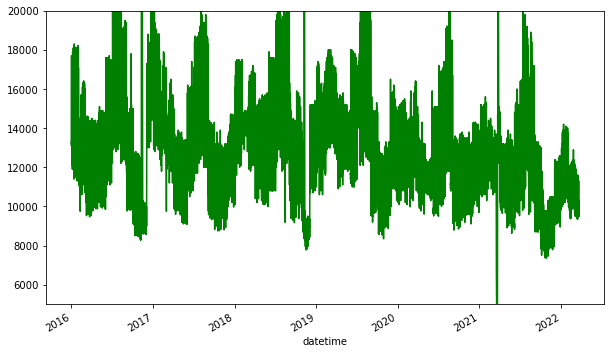

In [8]:
ax = alldat['phantom'].loc[alldat['phantom'].index.year>2015].Q.plot(figsize=(10,6))
plt.ylim([5000,20000])
plt.figure(figsize=(10,6))

alldat['lees'].loc[alldat['lees'].index.year>2015].Q.plot(color='orange')
plt.ylim([5000,20000])
plt.figure(figsize=(10,6))

alldat['diamond'].loc[alldat['diamond'].index.year>2015].Q.plot(color='green')

plt.ylim([5000,20000])